<a href="https://colab.research.google.com/github/NathaliaLMCOliveira/projeto-curso-git/blob/master/TCC%20P%C3%B3s%20Ci%C3%AAncia%20de%20Dados%20e%20Big%20Data%20-%20Puc%20Minas%20Virtual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das Bibliotecas**

In [2]:
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import itertools

from google.colab import drive
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from dateutil.parser import parse
from tqdm import tqdm


pd.options.mode.chained_assignment = None

# **Importação das bases**


In [3]:
# Faz o download do dataset zipado a partir do Google Drive
!gdown --quiet --id '1ZIxTpVKpD_UFfpII-kQ0ZenKNC27R7Xk'

# Faz a extração do arquivo baixado
with zipfile.ZipFile('Base_de_dados.zip', 'r') as zipp:
    zipp.extractall()
    zipp.close()

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,


In [4]:
# Cria o dataframe das condições dos pavimentos a partir do csv
df_01 = pd.read_csv('Base de dados/icm_01_2021.csv', sep=';')
df_02 = pd.read_csv('Base de dados/icm_02_2021.csv', sep=';')
df_03 = pd.read_csv('Base de dados/icm_03_2021.csv', sep=';')
df_04 = pd.read_csv('Base de dados/icm_04_2021.csv', sep=';')
df_06 = pd.read_csv('Base de dados/icm_06_2021.csv', sep=';')
df_07 = pd.read_csv('Base de dados/icm_07_2021.csv', sep=';')
df_08 = pd.read_csv('Base de dados/icm_08_2021.csv', sep=';')
df_09 = pd.read_csv('Base de dados/icm_09_2021.csv', sep=';')
df_10 = pd.read_csv('Base de dados/icm_10_2021.csv', sep=';')
df_11 = pd.read_csv('Base de dados/icm_11_2021.csv', sep=';')
df_12 = pd.read_csv('Base de dados/icm_12_2021.csv', sep=';')

# União dos df (Condições do pavimento)
df_condicoes_pista = pd.concat([df_01,df_02,df_03,df_04,df_06,df_07,df_08,df_09,df_10,df_11,df_12])
df_condicoes_pista

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,Observação,ICC,ICP,ICM,ICMNP
0,PR,BR-476,"277,900","278,000","0,100",05/01/2021,"-25,8683344","-50,3966359",NaN,"62,500","32,500","41,500",NaN
1,PR,BR-476,"278,000","279,000","1,000",05/01/2021,"-25,8700533","-50,3957804",NaN,"62,500","25,000","36,250",NaN
2,PR,BR-476,"279,000","280,000","1,000",05/01/2021,"-25,887866","-50,4306543",NaN,"62,500","45,000","50,250",NaN
3,PR,BR-476,"280,000","281,000","1,000",05/01/2021,"-25,8700533","-50,3957804",NaN,"50,000","32,500","37,750",NaN
4,PR,BR-476,"281,000","282,000","1,000",05/01/2021,"-25,887866","-50,4306543",NaN,"42,500","47,500","46,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41411,AC,BR-307,"185,000","186,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"42,500","5,000","16,250",NaN
41412,AC,BR-307,"186,000","187,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"30,000","35,000","33,500",NaN
41413,AC,BR-307,"187,000","188,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"42,500","35,000","37,250",NaN
41414,AC,BR-307,"188,000","189,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"42,500","20,000","26,750",NaN


In [5]:
# Cria o dataframe de acidentes a partir do csv
df_acidentes = pd.read_csv('Base de dados/datatran2021.csv', sep=';')
df_acidentes

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,01/01/2021,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,-2.843.029.392,-4.884.925.073,SR-SC,UOP01,DEL02
1,331694,01/01/2021,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,0,2,1,-2.346.634.923,-5.182.808.011,SR-PR,UOP01,DEL09
2,331696,01/01/2021,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,-2.303.412.614,-455.526.999,SR-SP,UOP01,DEL06
3,331699,01/01/2021,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,-2.683.955.734,-4.871.418.074,SR-SC,UOP04,DEL04
4,331701,01/01/2021,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,-786.521.297,-3.490.715.176,SR-PE,UOP02,DEL01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64436,414938,03/07/2021,sábado,10:40:00,SC,470.0,117,IBIRAMA,Conversão proibida,Colisão transversal,...,0,1,0,1,2,-27.081.692,-49.502.277,SR-SC,UOP02,DEL04
64437,414939,23/09/2021,quinta-feira,17:00:00,MT,364.0,551,ROSARIO OESTE,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,0,0,1,1,-14.840.096,-56.440.548,SR-MT,UOP01,DEL01
64438,415073,13/12/2021,segunda-feira,06:55:00,SP,116.0,115,TAUBATE,Ultrapassagem Indevida,Colisão transversal,...,0,3,0,0,2,-230.496.047,-4.559.973.712,SR-SP,UOP02,DEL02
64439,415112,11/11/2021,quinta-feira,11:25:00,MG,381.0,385,SAO GONCALO DO RIO ABAIXO,Velocidade Incompatível,Saída de leito carroçável,...,0,0,0,2,1,-1.982.895.247,-4.335.565.567,SR-MG,UOP01,DEL01


In [6]:
# Cria o dataframe de frotas por uf
df_frota = pd.read_csv('Base de dados/Base Frota 2021.csv', sep=';')
df_frota

,UF,dez/21
0,AC,320173
1,AP,224208
2,AM,1014026
3,PA,2352727
4,RO,1113279
5,RR,250675
6,TO,791463
7,AL,981823
8,BA,4695972
9,CE,3513199


# **Tratamento dos dados**


### Extração do mês a partir da coluna de data

In [7]:
# Criação da coluna mês
df_acidentes['mes'] = pd.to_datetime(df_acidentes['data_inversa'], dayfirst=True).dt.month
df_condicoes_pista['mes'] = pd.to_datetime(df_condicoes_pista['Data'], dayfirst=True).dt.month
df_condicoes_pista

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,Observação,ICC,ICP,ICM,ICMNP,mes
0,PR,BR-476,"277,900","278,000","0,100",05/01/2021,"-25,8683344","-50,3966359",NaN,"62,500","32,500","41,500",NaN,1.0
1,PR,BR-476,"278,000","279,000","1,000",05/01/2021,"-25,8700533","-50,3957804",NaN,"62,500","25,000","36,250",NaN,1.0
2,PR,BR-476,"279,000","280,000","1,000",05/01/2021,"-25,887866","-50,4306543",NaN,"62,500","45,000","50,250",NaN,1.0
3,PR,BR-476,"280,000","281,000","1,000",05/01/2021,"-25,8700533","-50,3957804",NaN,"50,000","32,500","37,750",NaN,1.0
4,PR,BR-476,"281,000","282,000","1,000",05/01/2021,"-25,887866","-50,4306543",NaN,"42,500","47,500","46,000",NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41411,AC,BR-307,"185,000","186,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"42,500","5,000","16,250",NaN,12.0
41412,AC,BR-307,"186,000","187,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"30,000","35,000","33,500",NaN,12.0
41413,AC,BR-307,"187,000","188,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"42,500","35,000","37,250",NaN,12.0
41414,AC,BR-307,"188,000","189,000","1,000",20/12/2021,"-7,742053","-72,6543303",NaN,"42,500","20,000","26,750",NaN,12.0


### Remoção de colunas


In [8]:
# Remove colunas desnecessárias
df_condicoes_pista.drop(columns=['Latitude','Longitude','Observação','km final','Extensão (km)','ICMNP','ICC','ICP', 'Data'], inplace=True)
df_condicoes_pista.head()

,UF,Rodovia,km inicial,ICM,mes
0,PR,BR-476,"277,900","41,500",1.0
1,PR,BR-476,"278,000","36,250",1.0
2,PR,BR-476,"279,000","50,250",1.0
3,PR,BR-476,"280,000","37,750",1.0
4,PR,BR-476,"281,000","46,000",1.0


In [9]:
# Remove colunas desnecessárias
df_acidentes.drop(columns=['data_inversa', 'dia_semana', 'horario', 'latitude','longitude','regional','delegacia','uop','id',
                           'condicao_metereologica','ignorados','feridos','veiculos','fase_dia','tracado_via','uso_solo','pessoas','mortos','feridos_leves','feridos_graves','ilesos', 'sentido_via'], inplace=True)
df_acidentes.head()

,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes
0,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Dupla,1
1,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Dupla,1
2,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Dupla,1
3,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Múltipla,1
4,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Múltipla,1


### Renomeação das colunas


In [10]:
novas_colunas = {
    'UF': 'uf',
    'Rodovia': 'rodovia',
    'km inicial': 'km',
    'ICM': 'icm',
}
df_condicoes_pista.rename(columns=novas_colunas, inplace=True)
df_condicoes_pista.head()

,uf,rodovia,km,icm,mes
0,PR,BR-476,"277,900","41,500",1.0
1,PR,BR-476,"278,000","36,250",1.0
2,PR,BR-476,"279,000","50,250",1.0
3,PR,BR-476,"280,000","37,750",1.0
4,PR,BR-476,"281,000","46,000",1.0


In [11]:
novas_colunas = {
    'br': 'rodovia',
}
df_acidentes.rename(columns=novas_colunas, inplace=True)
df_acidentes.head()

,uf,rodovia,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes
0,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Dupla,1
1,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Dupla,1
2,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Dupla,1
3,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Múltipla,1
4,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Múltipla,1


In [12]:
novas_colunas = {
    'UF': 'uf',
}
df_frota.rename(columns=novas_colunas, inplace=True)
df_frota.head()

,uf,dez/21
0,AC,320173
1,AP,224208
2,AM,1014026
3,PA,2352727
4,RO,1113279


### Conversão dos tipos de dados



In [13]:
# Substitui as virgulas por pontos
df_condicoes_pista['km'] = df_condicoes_pista['km'].str.replace(',', '.')
df_condicoes_pista['icm'] = df_condicoes_pista['icm'].str.replace(',', '.')

# Converte as colunas numericas
df_condicoes_pista['km'] = pd.to_numeric(df_condicoes_pista['km'], errors='coerce').fillna(0).astype(int)
df_condicoes_pista['icm'] = pd.to_numeric(df_condicoes_pista['icm'], errors='coerce').fillna(0.0)

df_condicoes_pista.head()

,uf,rodovia,km,icm,mes
0,PR,BR-476,277,41.50,1.0
1,PR,BR-476,278,36.25,1.0
2,PR,BR-476,279,50.25,1.0
3,PR,BR-476,280,37.75,1.0
4,PR,BR-476,281,46.00,1.0


In [14]:
# Converte a coluna "rodovia" para inteiro e adiciona prefixo "BR-" 
df_acidentes['rodovia'] = df_acidentes['rodovia'].fillna(0.0).astype(int)
df_acidentes['rodovia'] = 'BR-' + df_acidentes['rodovia'].astype(str)

# Converte a coluna "km" para inteiro
df_acidentes['km'] = df_acidentes['km'].str.replace(',', '.')
df_acidentes['km'] = pd.to_numeric(df_acidentes['km'], errors='coerce').fillna(0).astype(int)

df_acidentes.head()

,uf,rodovia,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes
0,SC,BR-101,314,LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Dupla,1
1,PR,BR-376,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Dupla,1
2,SP,BR-116,110,TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Dupla,1
3,SC,BR-101,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Múltipla,1
4,PE,BR-101,45,IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Múltipla,1


### Filtragem das causas dos acidentes

In [15]:
# Seleção das causas dos acidentes
causas_acidente_selecionadas = [ 
 'Sinalização mal posicionada',
 'Pista Escorregadia',
 'Afundamento ou ondulação no pavimento',
 'Acumulo de água sobre o pavimento',
 'Falta de acostamento',
 'Frear bruscamente',
 'Obras na pista',
 'Ausência de sinalização',
 'Acumulo de óleo sobre o pavimento',
 'Acostamento em desnível',
 'Acumulo de areia ou detritos sobre o pavimento',
 'Demais falhas na via',
 'Deficiência do Sistema de Iluminação/Sinalização',
 'Obstrução na via',
 'Desvio temporário',
 'Pista em desnível',
 'Pista esburacada',
 'Restrição de visibilidade em curvas verticais',
 'Restrição de visibilidade em curvas horizontais',
 'Semáforo com defeito',
 'Faixas de trânsito com largura insuficiente',
 'Sinalização encoberta',
 'Sistema de drenagem ineficiente']

In [16]:
# Filtro dos acidentes
df_acidentes = df_acidentes.loc[df_acidentes['causa_acidente'].isin(causas_acidente_selecionadas)]
df_acidentes

,uf,rodovia,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes
63,SC,BR-470,54,BLUMENAU,Sinalização mal posicionada,Colisão transversal,Com Vítimas Feridas,Simples,1
67,SP,BR-116,541,BARRA DO TURVO,Pista Escorregadia,Colisão com objeto,Com Vítimas Feridas,Dupla,1
99,PR,BR-277,51,SAO JOSE DOS PINHAIS,Pista Escorregadia,Saída de leito carroçável,Com Vítimas Feridas,Dupla,1
123,SP,BR-116,453,REGISTRO,Pista Escorregadia,Tombamento,Com Vítimas Feridas,Dupla,1
138,RJ,BR-493,122,ITAGUAI,Afundamento ou ondulação no pavimento,Colisão traseira,Com Vítimas Feridas,Simples,1
...,...,...,...,...,...,...,...,...,...
64317,PA,BR-316,55,CASTANHAL,Afundamento ou ondulação no pavimento,Tombamento,Com Vítimas Feridas,Dupla,7
64343,MG,BR-116,430,ALPERCATA,Acumulo de óleo sobre o pavimento,Tombamento,Com Vítimas Feridas,Simples,11
64371,PB,BR-101,115,CAAPORA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Dupla,7
64414,RJ,BR-40,83,PETROPOLIS,Acumulo de óleo sobre o pavimento,Colisão traseira,Com Vítimas Feridas,Dupla,10


### Reset do índice

In [17]:
# Reseta o indice
df_acidentes.reset_index(inplace=True, drop=True)
df_condicoes_pista.reset_index(inplace=True, drop=True)

# Transforma o novo indice em uma coluna para referencia de contagem
df_acidentes.reset_index(inplace=True)
df_condicoes_pista.reset_index(inplace=True)

# Altera o nome da coluna de 'index' para 'indice'
df_acidentes.rename(columns={'index': 'contador_acidente'}, inplace=True)
df_condicoes_pista.rename(columns={'index': 'contador_condicao'}, inplace=True)

### Merge dos dataframes

In [18]:
df_merge = pd.merge(df_acidentes, df_condicoes_pista, how='inner', on=['uf', 'rodovia', 'km', 'mes'])
 
# Transforma o indice em uma coluna para referencia de contagem
df_merge.reset_index(inplace=True)

# Altera o nome da coluna index para indice
df_merge.rename(columns={'index': 'contador'}, inplace=True)

# Remove as colunas de contador de acidente e condição
df_merge.drop(columns=['contador_acidente','contador_condicao'], inplace=True)

df_merge

,contador,uf,rodovia,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes,icm
0,0,SC,BR-470,54,BLUMENAU,Sinalização mal posicionada,Colisão transversal,Com Vítimas Feridas,Simples,1,68.00
1,1,RJ,BR-493,122,ITAGUAI,Afundamento ou ondulação no pavimento,Colisão traseira,Com Vítimas Feridas,Simples,1,25.00
2,2,SC,BR-280,33,ARAQUARI,Pista Escorregadia,Capotamento,Com Vítimas Feridas,Simples,1,43.75
3,3,CE,BR-222,7,CAUCAIA,Frear bruscamente,Capotamento,Sem Vítimas,Dupla,1,53.25
4,4,CE,BR-222,7,CAUCAIA,Frear bruscamente,Capotamento,Sem Vítimas,Dupla,1,42.25
...,...,...,...,...,...,...,...,...,...,...,...
1418,1418,MT,BR-174,429,NOVA LACERDA,Acostamento em desnível,Saída de leito carroçável,Com Vítimas Feridas,Simples,11,14.75
1419,1419,PI,BR-343,13,PARNAIBA,Ausência de sinalização,Colisão traseira,Sem Vítimas,Dupla,12,26.75
1420,1420,PA,BR-316,55,CASTANHAL,Afundamento ou ondulação no pavimento,Tombamento,Com Vítimas Feridas,Dupla,7,33.50
1421,1421,PA,BR-316,55,CASTANHAL,Afundamento ou ondulação no pavimento,Tombamento,Com Vítimas Feridas,Dupla,7,20.25


# **Análise e plotagem dos gráficos**

In [19]:
# Comparação da condição média das pistas em geral e apenas nos trechos onde houveram acidentes
print('Média da condição de todas as pistas: ', df_condicoes_pista.describe().loc['mean', 'icm'])
print('Média da condição das pistas onde houveram acidentes: ', df_merge.describe().loc['mean', 'icm'])

Média da condição de todas as pistas:  30.24222791097791
Média da condição das pistas onde houveram acidentes:  36.22224174279691


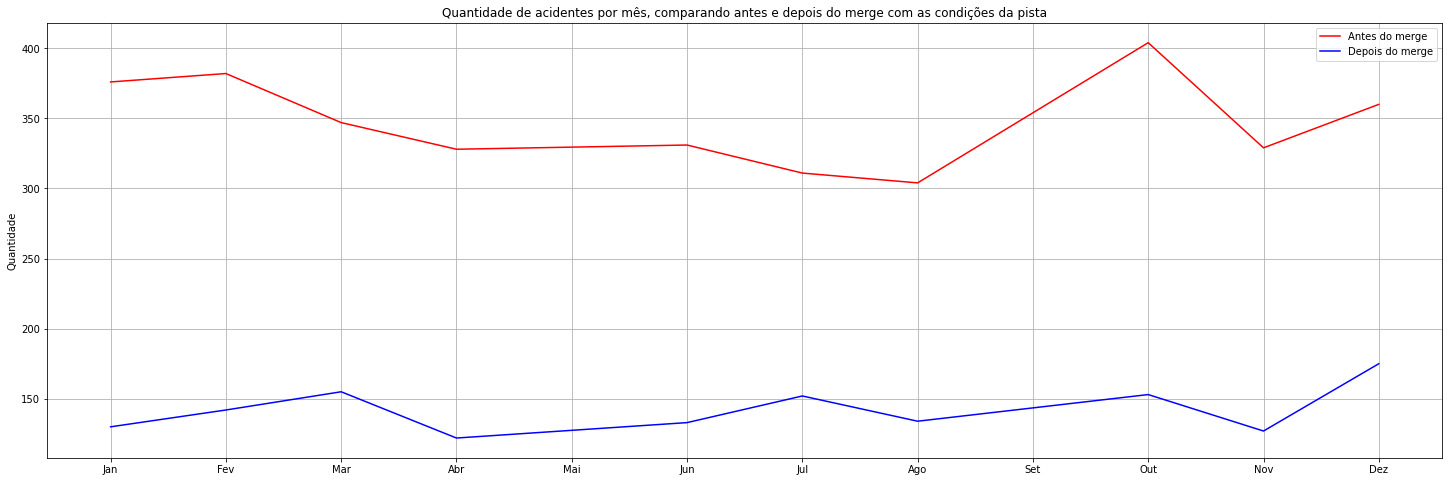

In [20]:
# Quantidade de acidentes por mês, comparando antes e depois do merge com as condições da pista
df_temp = df_acidentes[['mes', 'contador_acidente']].groupby(by=["mes"]).count()

df_temp_2 = df_merge[['mes', 'contador']].groupby(by=["mes"]).count()

df_temp_3 = pd.merge(df_temp, df_temp_2, how='inner', on='mes')

plt.figure(figsize=(25, 8))
plt.title('Quantidade de acidentes por mês, comparando antes e depois do merge com as condições da pista')
plt.ylabel('Quantidade')
plt.plot(df_temp_3.index, df_temp_3['contador_acidente'], 'r', label='Antes do merge')
plt.plot(df_temp_3.index, df_temp_3['contador'], 'b', label='Depois do merge')
plt.grid()
plt.legend()
plt.xticks(range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

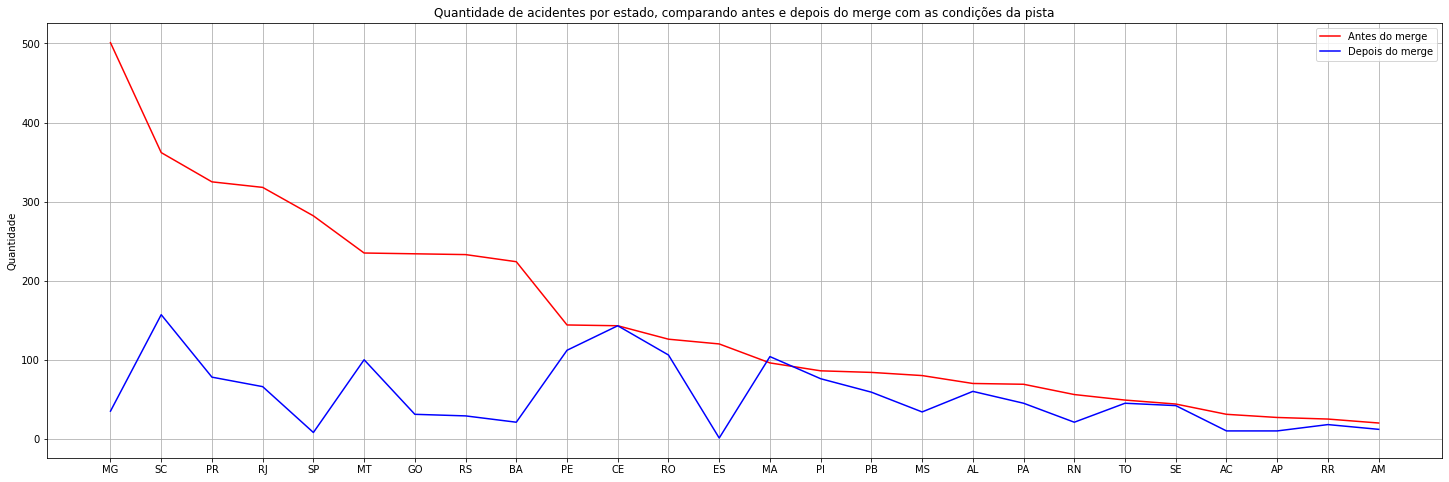

In [21]:
# Quantidade de acidentes por estado, comparando antes e depois do merge com as condições da pista
df_temp = df_acidentes[['uf', 'contador_acidente']].groupby(by=["uf"]).count()

df_temp_2 = df_merge[['uf', 'contador']].groupby(by=["uf"]).count()

df_temp_3 = pd.merge(df_temp, df_temp_2, how='inner', on='uf')
df_temp_3.sort_values(['contador_acidente'], ascending=False, inplace=True)

plt.figure(figsize=(25, 8))
plt.title('Quantidade de acidentes por estado, comparando antes e depois do merge com as condições da pista')
plt.ylabel('Quantidade')
plt.plot(df_temp_3.index, df_temp_3['contador_acidente'], 'r', label='Antes do merge')
plt.plot(df_temp_3.index, df_temp_3['contador'], 'b', label='Depois do merge')
plt.grid()
plt.legend()
plt.show()

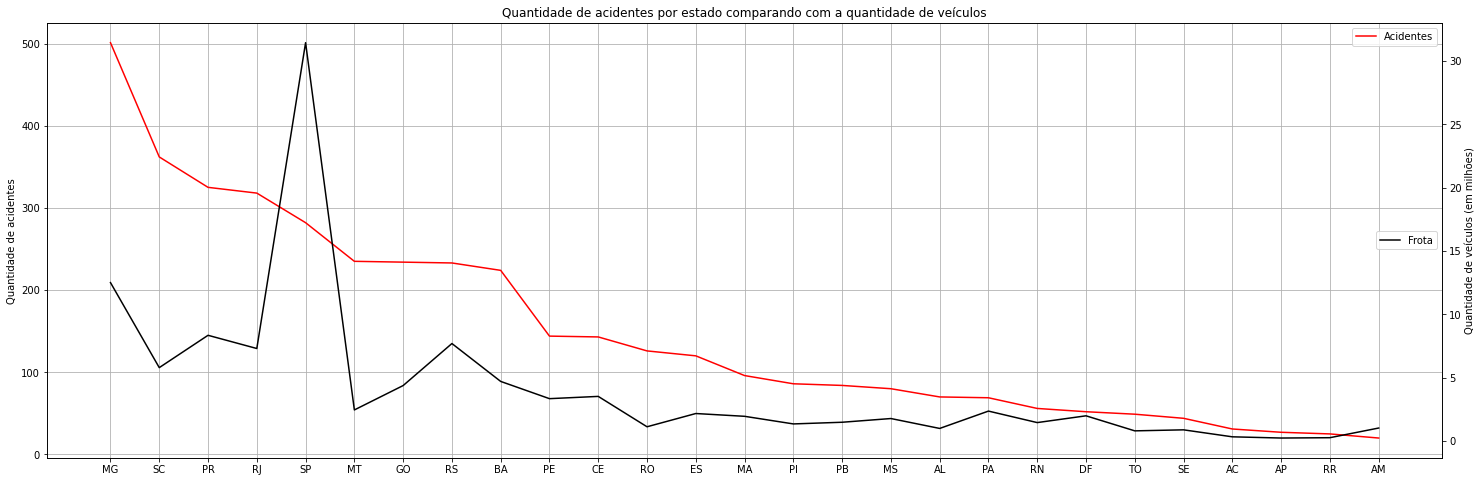

In [22]:
# Quantidade de acidentes por estado comparando com a quantidade de veículos
df_temp = df_acidentes[['uf', 'contador_acidente']].groupby(by=["uf"]).count()

df_temp_3 = pd.merge(df_temp, df_frota, how='inner', on='uf')
df_temp_3.sort_values(['contador_acidente'], ascending=False, inplace=True)

fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(111)
ax1.plot(df_temp_3['uf'], df_temp_3['contador_acidente'], 'r', label='Acidentes')
ax1.set_ylabel('Quantidade de acidentes')
ax1.legend(loc="upper right")
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(df_temp_3['uf'], df_temp_3['dez/21']/1e6, 'k', label='Frota')
ax2.set_ylabel('Quantidade de veículos (em milhões)')
ax2.legend(loc="center right")
plt.title('Quantidade de acidentes por estado comparando com a quantidade de veículos')
plt.show()

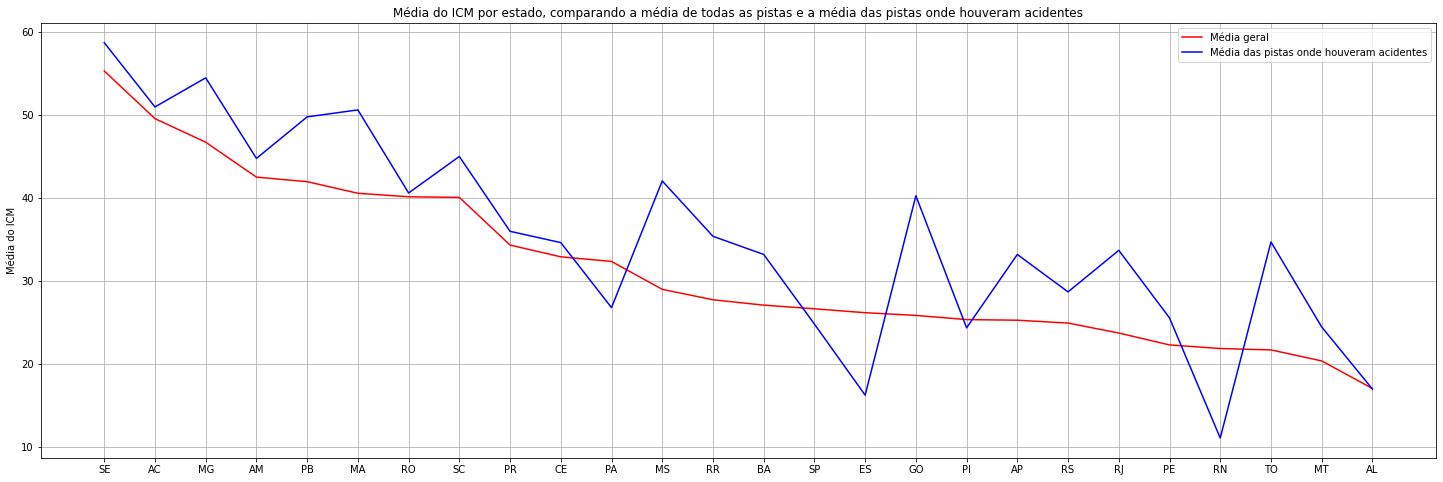

In [23]:
# Média do ICM por estado, comparando a média de todas as pistas e a média das pistas onde houveram acidentes
df_temp = df_merge[['uf', 'icm']].groupby(by=["uf"]).mean()
df_temp.rename(columns={'icm': 'icm_com_acidentes'}, inplace=True)

df_temp_2 = df_condicoes_pista[['uf', 'icm']].groupby(by=["uf"]).mean()
df_temp_2.rename(columns={'icm': 'icm_geral'}, inplace=True)

df_temp_3 = pd.merge(df_temp, df_temp_2, how='inner', on='uf')
df_temp_3.sort_values(['icm_geral'], ascending=False, inplace=True)

plt.figure(figsize=(25, 8))
plt.title('Média do ICM por estado, comparando a média de todas as pistas e a média das pistas onde houveram acidentes')
plt.ylabel('Média do ICM')
plt.plot(df_temp_3.index, df_temp_3['icm_geral'], 'r', label='Média geral')
plt.plot(df_temp_3.index, df_temp_3['icm_com_acidentes'], 'b', label='Média das pistas onde houveram acidentes')
plt.legend()
plt.grid()
plt.show()

In [24]:
df_merge[df_merge['uf']=='ES']

,contador,uf,rodovia,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes,icm
829,829,ES,BR-259,45,COLATINA,Acumulo de areia ou detritos sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Simples,8,16.25


In [25]:
df_merge[df_merge['uf']=='RN']

,contador,uf,rodovia,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,tipo_pista,mes,icm
998,998,RN,BR-101,96,NATAL,Pista esburacada,Tombamento,Com Vítimas Feridas,Múltipla,10,7.50
999,999,RN,BR-101,96,NATAL,Pista esburacada,Tombamento,Com Vítimas Feridas,Múltipla,10,11.25
1000,1000,RN,BR-101,96,NATAL,Pista esburacada,Tombamento,Com Vítimas Feridas,Múltipla,10,11.25
1001,1001,RN,BR-101,96,NATAL,Pista esburacada,Tombamento,Com Vítimas Feridas,Múltipla,10,11.00
1036,1036,RN,BR-304,299,MACAIBA,Acumulo de óleo sobre o pavimento,Tombamento,Com Vítimas Feridas,Dupla,10,9.75
1037,1037,RN,BR-304,299,MACAIBA,Acumulo de óleo sobre o pavimento,Tombamento,Com Vítimas Feridas,Dupla,10,11.25
1038,1038,RN,BR-304,299,MACAIBA,Acumulo de óleo sobre o pavimento,Tombamento,Com Vítimas Feridas,Dupla,10,11.25
1039,1039,RN,BR-304,299,MACAIBA,Acumulo de óleo sobre o pavimento,Tombamento,Com Vítimas Feridas,Dupla,10,11.25
1108,1108,RN,BR-405,6,MOSSORO,Deficiência do Sistema de Iluminação/Sinalização,Colisão traseira,Com Vítimas Feridas,Simples,10,6.00
1109,1109,RN,BR-405,6,MOSSORO,Deficiência do Sistema de Iluminação/Sinalização,Colisão traseira,Com Vítimas Feridas,Simples,10,7.50


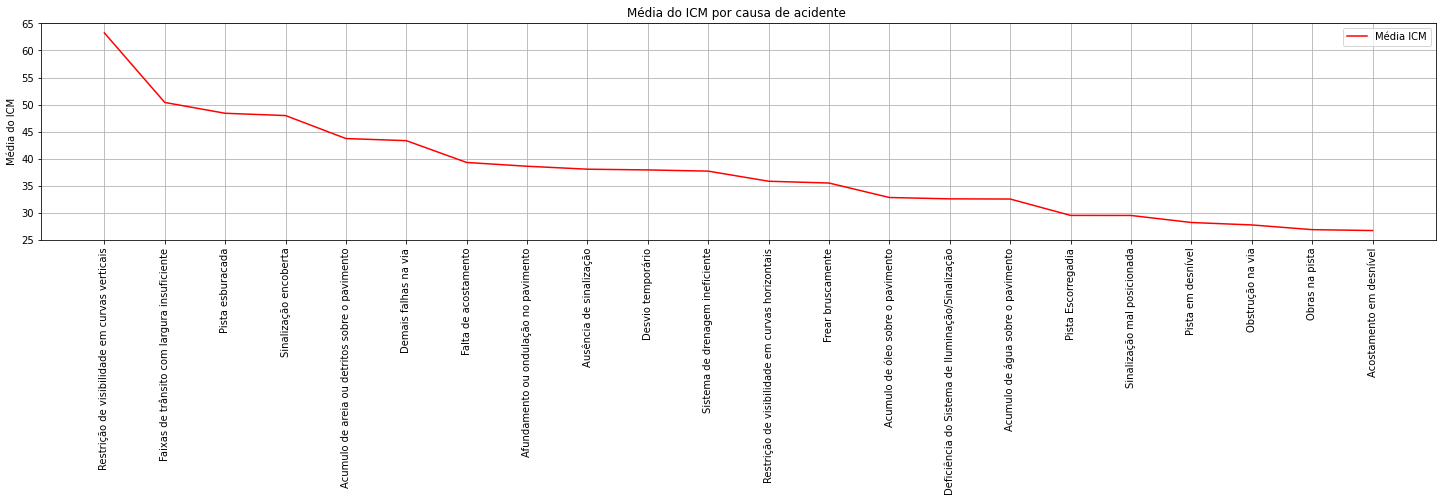

In [29]:
# Média do ICM por estado, comparando a média de todas as pistas e a média das pistas onde houveram acidentes
df_temp = df_merge[['causa_acidente', 'icm']].groupby(by=["causa_acidente"]).mean()
df_temp.sort_values(['icm'], ascending=False, inplace=True)

plt.figure(figsize=(25, 4))
plt.title('Média do ICM por causa de acidente ')
plt.ylabel('Média do ICM')
plt.plot(df_temp.index, df_temp['icm'], 'r', label='Média ICM')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

# **Machine Learning**

As bases serão importadas novamente porque será feito um processamento diferente

## Tratamento inicial dos dados

In [ ]:
# Faz o download do dataset zipado a partir do Google Drive
!gdown --quiet --id '1ZIxTpVKpD_UFfpII-kQ0ZenKNC27R7Xk'

# Faz a extração do arquivo baixado
with zipfile.ZipFile('Base_de_dados.zip', 'r') as zipp:
    zipp.extractall()
    zipp.close()

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,


In [ ]:
# Cria o dataframe das condições dos pavimentos a partir do csv
df_01 = pd.read_csv('Base de dados/icm_01_2021.csv', sep=';')
df_02 = pd.read_csv('Base de dados/icm_02_2021.csv', sep=';')
df_03 = pd.read_csv('Base de dados/icm_03_2021.csv', sep=';')
df_04 = pd.read_csv('Base de dados/icm_04_2021.csv', sep=';')
df_06 = pd.read_csv('Base de dados/icm_06_2021.csv', sep=';')
df_07 = pd.read_csv('Base de dados/icm_07_2021.csv', sep=';')
df_08 = pd.read_csv('Base de dados/icm_08_2021.csv', sep=';')
df_09 = pd.read_csv('Base de dados/icm_09_2021.csv', sep=';')
df_10 = pd.read_csv('Base de dados/icm_10_2021.csv', sep=';')
df_11 = pd.read_csv('Base de dados/icm_11_2021.csv', sep=';')
df_12 = pd.read_csv('Base de dados/icm_12_2021.csv', sep=';')

# União dos df (Condições do pavimento)
df_condicoes_pista = pd.concat([df_01, df_02, df_03, df_04, df_06, df_07, df_08, df_09, df_10, df_11, df_12])

# Remoção de algumas colunas
df_condicoes_pista.drop(columns=['Latitude', 'Longitude', 'Observação', 'ICMNP', 'Extensão (km)'], inplace=True)

# Renomeação das colunas
novas_colunas = {
    'UF': 'uf',
    'Rodovia': 'rodovia',
    'km inicial': 'km_inicial',
    'km final': 'km_final',
    'Data': 'data_condicao',
    'ICC': 'icc',
    'ICP': 'icp',
    'ICM': 'icm'
}
df_condicoes_pista.rename(columns=novas_colunas, inplace=True)

# Remove NA
df_condicoes_pista.dropna(inplace=True)

# Removendo o BR- do nome da rodovia
df_condicoes_pista['rodovia'] = df_condicoes_pista['rodovia'].str.replace('BR-', '').astype(int)

# Substitui as virgulas por pontos e converte para numérico
for coluna in ['km_inicial', 'km_final', 'icc', 'icp', 'icm']:
    df_condicoes_pista[coluna] = df_condicoes_pista[coluna].str.replace(',', '.')
    df_condicoes_pista[coluna] = pd.to_numeric(df_condicoes_pista[coluna])

# Converte para data. A representação automaticamente passará a ser aaaa/mm/dd
df_condicoes_pista['data_condicao'] = pd.to_datetime(df_condicoes_pista['data_condicao'], dayfirst=True)

# Criação da coluna mês
df_condicoes_pista['mes_condicao'] = df_condicoes_pista['data_condicao'].dt.month

# Cria uma coluna de sentido da via
df_condicoes_pista['sentido_via'] = np.where(df_condicoes_pista['km_inicial'] <= df_condicoes_pista['km_final'], 'Crescente', 'Decrescente')

# Reseta o indice e define como sendo a coluna de id_condicao (que será usada no merge)
df_condicoes_pista.reset_index(inplace=True, drop=True)
df_condicoes_pista.reset_index(inplace=True)
df_condicoes_pista.rename(columns={ 'index': 'id_condicao'}, inplace=True)

df_condicoes_pista

,id_condicao,uf,rodovia,km_inicial,km_final,data_condicao,icc,icp,icm,mes_condicao,sentido_via
0,0,PR,476,277.9,278.0,2021-01-05,62.5,32.5,41.50,1,Crescente
1,1,PR,476,278.0,279.0,2021-01-05,62.5,25.0,36.25,1,Crescente
2,2,PR,476,279.0,280.0,2021-01-05,62.5,45.0,50.25,1,Crescente
3,3,PR,476,280.0,281.0,2021-01-05,50.0,32.5,37.75,1,Crescente
4,4,PR,476,281.0,282.0,2021-01-05,42.5,47.5,46.00,1,Crescente
...,...,...,...,...,...,...,...,...,...,...,...
358319,358319,AC,307,185.0,186.0,2021-12-20,42.5,5.0,16.25,12,Crescente
358320,358320,AC,307,186.0,187.0,2021-12-20,30.0,35.0,33.50,12,Crescente
358321,358321,AC,307,187.0,188.0,2021-12-20,42.5,35.0,37.25,12,Crescente
358322,358322,AC,307,188.0,189.0,2021-12-20,42.5,20.0,26.75,12,Crescente


In [ ]:
# Cria o dataframe de acidentes a partir do csv
df_acidentes = pd.read_csv('Base de dados/datatran2021.csv', sep=';')

# Remoção de algumas colunas
df_acidentes.drop(columns=['id', 'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ignorados', 'feridos', 'veiculos', 'uso_solo', 'pessoas', 'mortos', 
                           'feridos_leves', 'feridos_graves', 'ilesos', 'classificacao_acidente', 'municipio'], inplace=True)

# Renomeação das colunas
novas_colunas = {
    'data_inversa': 'data_acidente',
    'br': 'rodovia',
    'km': 'km_acidente'
}
df_acidentes.rename(columns=novas_colunas, inplace=True)

# Remove NA
df_acidentes.dropna(inplace=True)

# Substitui as virgulas por pontos e converte para numérico
df_acidentes['km_acidente'] = df_acidentes['km_acidente'].str.replace(',', '.')
df_acidentes['km_acidente'] = pd.to_numeric(df_acidentes['km_acidente'])

# Converte para inteiro
df_acidentes['rodovia'] = df_acidentes['rodovia'].astype(int)

# Converte para data. A representação automaticamente passará a ser aaaa/mm/dd
df_acidentes['data_acidente'] = pd.to_datetime(df_acidentes['data_acidente'], dayfirst=True)

# Criação da coluna mês
df_acidentes['mes_acidente'] = df_acidentes['data_acidente'].dt.month

# Filtragem das causas dos acidentes
causas_acidente_selecionadas = [ 
    'Iluminação deficiente',
    'Objeto estático sobre o leito carroçável',
    'Falta de elemento de contenção que evite a saída do leito carroçável',
    'Sinalização mal posicionada',
    'Pista Escorregadia',
    'Chuva',
    'Curva acentuada',
    'Afundamento ou ondulação no pavimento',
    'Acumulo de água sobre o pavimento',
    'Falta de acostamento',
    'Obras na pista',
    'Ausência de sinalização',
    'Acumulo de óleo sobre o pavimento',
    'Acostamento em desnível',
    'Acumulo de areia ou detritos sobre o pavimento',
    'Redutor de velocidade em desacordo',
    'Demais falhas na via',
    'Deficiência do Sistema de Iluminação/Sinalização',
    'Obstrução na via',
    'Área urbana sem a presença de local apropriado para a travessia de pedestres',
    'Desvio temporário',
    'Pista em desnível',
    'Pista esburacada',
    'Restrição de visibilidade em curvas verticais',
    'Restrição de visibilidade em curvas horizontais',
    'Semáforo com defeito',
    'Faixas de trânsito com largura insuficiente',
    'Sinalização encoberta',
    'Sistema de drenagem ineficiente'
]
df_acidentes = df_acidentes.loc[df_acidentes['causa_acidente'].isin(causas_acidente_selecionadas)]

# Agrupa as causas dos acidentes para reduzir o número de classes, de 29 para 9
agrupamento_dict = {
    'Problema de sinalização/iluminação': [
        'Sinalização mal posicionada',
        'Sinalização encoberta',
        'Ausência de sinalização',
        'Deficiência do Sistema de Iluminação/Sinalização',
        'Semáforo com defeito',
        'Iluminação deficiente',
    ],
    'Problema de visibilidade': [
        'Restrição de visibilidade em curvas horizontais', 
        'Restrição de visibilidade em curvas verticais'
    ],
    'Problema de drenagem': [
        'Sistema de drenagem ineficiente',
        'Pista Escorregadia', 
        'Acumulo de água sobre o pavimento',
        'Chuva'
    ],
    'Problema de desnível': [
        'Acostamento em desnível',
        'Pista em desnível'
    ],
    'Obras/obstáculos na pista': [
        'Obras na pista', 
        'Obstrução na via',
        'Desvio temporário',
        'Objeto estático sobre o leito carroçável'
    ],
    'Condição da pista': [
        'Afundamento ou ondulação no pavimento',
        'Pista esburacada',
        'Frear bruscamente',
        'Demais falhas na via'
    ],
    'Acúmulo de detritos': [
        'Acumulo de óleo sobre o pavimento',
        'Acumulo de areia ou detritos sobre o pavimento'
    ],
    'Pista estreita ou sem acostamento': [
        'Falta de acostamento', 
        'Faixas de trânsito com largura insuficiente'
    ],
    'Pista mal projetada': [
        'Falta de elemento de contenção que evite a saída do leito carroçável',
        'Curva acentuada',
        'Redutor de velocidade em desacordo',
        'Área urbana sem a presença de local apropriado para a travessia de pedestres'
    ]
}

for nova_causa, lista_causas_anteriores in agrupamento_dict.items():
    df_acidentes.loc[df_acidentes['causa_acidente'].isin(lista_causas_anteriores), 'causa_acidente'] = nova_causa

# Reseta o indice e define como sendo a coluna de id_acidente
df_acidentes.reset_index(inplace=True, drop=True)
df_acidentes.reset_index(inplace=True)
df_acidentes.rename(columns={ 'index': 'id_acidente'}, inplace=True)

df_acidentes

,id_acidente,data_acidente,dia_semana,horario,uf,rodovia,km_acidente,causa_acidente,tipo_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,mes_acidente
0,0,2021-01-01,sexta-feira,01:35:00,PR,376,596.0,Problema de sinalização/iluminação,Saída de leito carroçável,Plena Noite,Crescente,Chuva,Dupla,Reta,1
1,1,2021-01-01,sexta-feira,04:30:00,RJ,465,2.0,Obras/obstáculos na pista,Colisão frontal,Plena Noite,Crescente,Ignorado,Simples,Reta,1
2,2,2021-01-01,sexta-feira,05:10:00,MT,364,205.0,Pista mal projetada,Colisão com objeto,Pleno dia,Crescente,Céu Claro,Dupla,Reta,1
3,3,2021-01-01,sexta-feira,11:30:00,SC,470,54.4,Problema de sinalização/iluminação,Colisão transversal,Pleno dia,Crescente,Nublado,Simples,Interseção de vias,1
4,4,2021-01-01,sexta-feira,12:03:00,SP,116,541.0,Problema de drenagem,Colisão com objeto,Pleno dia,Crescente,Garoa/Chuvisco,Dupla,Curva,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5890,5890,2021-10-02,sábado,22:50:00,MG,116,774.0,Problema de drenagem,Saída de leito carroçável,Plena Noite,Decrescente,Chuva,Simples,Não Informado,10
5891,5891,2021-11-13,sábado,09:35:00,PR,116,17.2,Problema de drenagem,Colisão transversal,Pleno dia,Decrescente,Chuva,Dupla,Reta,11
5892,5892,2021-12-17,sexta-feira,19:00:00,MG,50,134.6,Problema de drenagem,Colisão traseira,Plena Noite,Crescente,Chuva,Dupla,Não Informado,12
5893,5893,2021-12-20,segunda-feira,11:35:00,RO,435,37.0,Condição da pista,Queda de ocupante de veículo,Pleno dia,Decrescente,Nublado,Simples,Reta,12


**Definição para determinar a condição da pista do local do acidente**

Visto que o dataframe de acidentes apenas informa uma coluna KM, e que a condição da pista é informada por trechos, com KM inicial e KM final, há um problema quando o KM do acidente coincide com o KM inicial de um trecho e o KM final de outro trecho. Por exemplo, um acidente no KM 2.0, pertence ao trecho 1-2 ou 2-3?

Sendo assim, define-se aqui que um acidente que ocorreu no KM Z.x terá a condição da pista no trecho entre o KM Z e o KM Z+1. Independente do sentido da pista.

Por exemplo, um acidente no KM 1.0, terá o trecho entre o KM 1 e o KM 2.

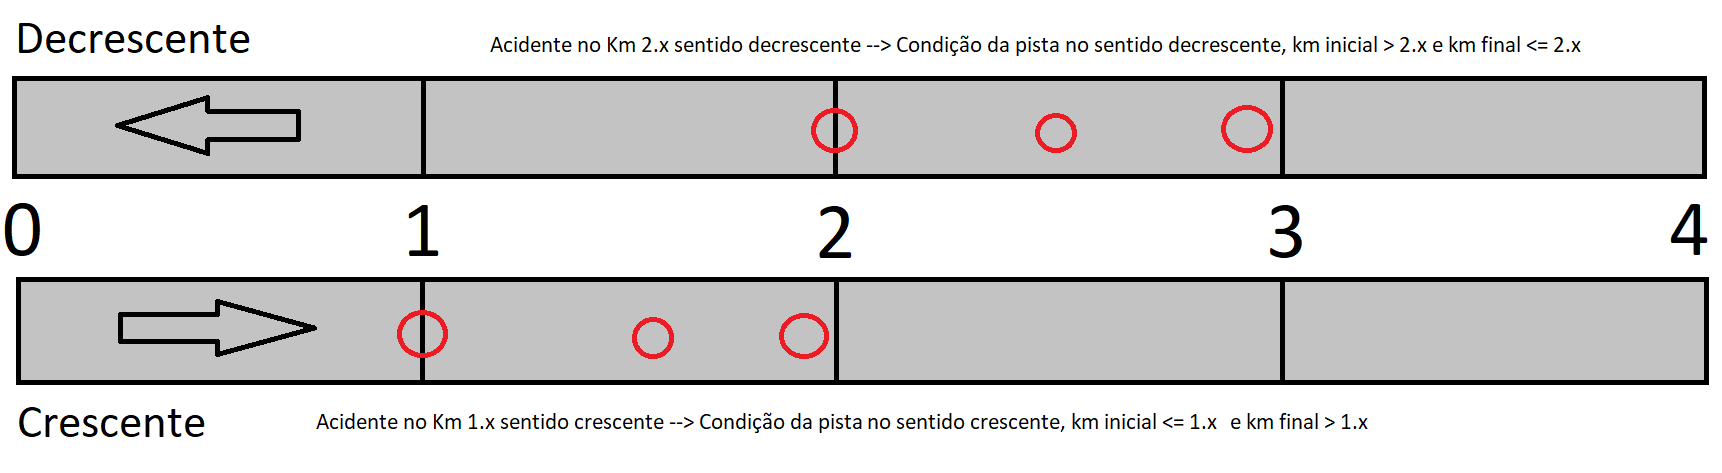

In [ ]:
# Identificação dos trechos onde os acidentes ocorreram
# Cria uma coluna de referência para o dataframe de condições da pista contendo o id do registro de condição da pista
df_acidentes['id_condicao'] = None

for index, row in tqdm(df_acidentes.iterrows(), total=df_acidentes.shape[0]):
    uf = row['uf']
    rodovia = row['rodovia']
    km_acidente = row['km_acidente']
    sentido_via = row['sentido_via']
    data_acidente = row['data_acidente']

    # Filtra o dataframe df_condicoes_pista pela localização
    if sentido_via == 'Crescente':
        df_trecho = df_condicoes_pista[
                        (df_condicoes_pista['uf'] == uf) 
                        & (df_condicoes_pista['rodovia'] == rodovia)
                        & (df_condicoes_pista['sentido_via'] == sentido_via)
                        & (df_condicoes_pista['km_inicial'] <= km_acidente)
                        & (df_condicoes_pista['km_final'] > km_acidente)]
    else:
        df_trecho = df_condicoes_pista[
                        (df_condicoes_pista['uf'] == uf) 
                        & (df_condicoes_pista['rodovia'] == rodovia)
                        & (df_condicoes_pista['sentido_via'] == sentido_via)
                        & (df_condicoes_pista['km_inicial'] > km_acidente)
                        & (df_condicoes_pista['km_final'] <= km_acidente)]

    if np.any(df_trecho):
        # Calcula a diferença de tempo entre o acidente e as condições da pista e utiliza a condição mais próxima da data do acidente
        df_diff = abs(df_trecho['data_condicao'] - data_acidente)

        # Vincula o id da condição da pista com o acidente
        df_acidentes.loc[index, 'id_condicao'] = df_diff.idxmin()


# Imprime quantos acidentes foram vinculados a uma condição da pista
print('Acidentes vinculados: ', len(df_acidentes[df_acidentes['id_condicao'].notnull()]))
print('Acidentes não vinculados: ', len(df_acidentes[df_acidentes['id_condicao'].isnull()]))

100%|██████████| 5895/5895 [05:26<00:00, 18.08it/s]

Acidentes vinculados:  2318
Acidentes não vinculados:  3577


In [ ]:
# Juntando os dois dataframes com left join
df_left_join = pd.merge(left=df_condicoes_pista, right=df_acidentes, how='left', on=['id_condicao', 'uf', 'rodovia', 'sentido_via'])

# Adiciona uma coluna indicando se houve ou não um acidente em um determinado trecho
df_left_join['houve_acidente'] = df_left_join['id_acidente'].notnull()

df_left_join

,id_condicao,uf,rodovia,km_inicial,km_final,data_condicao,icc,icp,icm,mes_condicao,...,horario,km_acidente,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,mes_acidente,houve_acidente
0,0,PR,476,277.9,278.0,2021-01-05,62.5,32.5,41.50,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,PR,476,278.0,279.0,2021-01-05,62.5,25.0,36.25,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,PR,476,279.0,280.0,2021-01-05,62.5,45.0,50.25,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,PR,476,280.0,281.0,2021-01-05,50.0,32.5,37.75,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,PR,476,281.0,282.0,2021-01-05,42.5,47.5,46.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358538,358319,AC,307,185.0,186.0,2021-12-20,42.5,5.0,16.25,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
358539,358320,AC,307,186.0,187.0,2021-12-20,30.0,35.0,33.50,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
358540,358321,AC,307,187.0,188.0,2021-12-20,42.5,35.0,37.25,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
358541,358322,AC,307,188.0,189.0,2021-12-20,42.5,20.0,26.75,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
# Juntando os dois dataframes com inner join
df_inner_join = pd.merge(left=df_condicoes_pista, right=df_acidentes, how='inner', on=['id_condicao', 'uf', 'rodovia', 'sentido_via'])
df_inner_join

,id_condicao,uf,rodovia,km_inicial,km_final,data_condicao,icc,icp,icm,mes_condicao,...,dia_semana,horario,km_acidente,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,mes_acidente
0,66,PR,476,343.0,344.0,2021-01-05,70.0,32.5,43.75,1,...,domingo,00:30:00,343.0,Problema de drenagem,Colisão lateral,Plena Noite,Chuva,Simples,Reta,1
1,93,PR,153,461.0,462.0,2021-01-05,37.5,37.5,37.50,1,...,quarta-feira,06:20:00,461.5,Problema de drenagem,Tombamento,Amanhecer,Chuva,Simples,Não Informado,3
2,117,PR,153,485.0,486.0,2021-01-05,50.0,47.5,48.25,1,...,quarta-feira,16:00:00,485.0,Problema de drenagem,Colisão frontal,Pleno dia,Chuva,Simples,Curva,1
3,162,PR,376,6.0,7.0,2021-01-05,32.5,20.0,23.75,1,...,sexta-feira,16:50:00,6.0,Problema de sinalização/iluminação,Incêndio,Pleno dia,Céu Claro,Dupla,Não Informado,3
4,263,PR,476,122.4,121.0,2021-01-06,25.0,25.0,25.00,1,...,quarta-feira,10:30:00,122.0,Obras/obstáculos na pista,Colisão lateral mesmo sentido,Pleno dia,Nublado,Dupla,Reta,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,357430,RJ,40,9.0,8.0,2021-12-14,37.5,25.0,28.75,12,...,terça-feira,19:40:00,8.5,Problema de drenagem,Saída de leito carroçável,Plena Noite,Garoa/Chuvisco,Dupla,Curva,10
2314,357434,RJ,40,5.0,4.0,2021-12-14,25.0,37.5,33.75,12,...,segunda-feira,15:20:00,4.0,Problema de drenagem,Saída de leito carroçável,Pleno dia,Chuva,Dupla,Curva,10
2315,357436,RJ,40,3.0,2.0,2021-12-14,25.0,100.0,77.50,12,...,terça-feira,12:50:00,2.8,Problema de drenagem,Colisão com objeto,Pleno dia,Chuva,Dupla,Curva,10
2316,357437,RJ,40,2.0,1.0,2021-12-14,25.0,25.0,25.00,12,...,segunda-feira,15:30:00,1.3,Problema de drenagem,Colisão com objeto,Pleno dia,Chuva,Dupla,Curva,10


## Predição se vai ocorrer um acidente ou não baseado na UF, rodovia, ICM, sentido da via, km inicial, km final, fase do dia e condição meteorelógica

Será usado o dataframe df_left_join. Mas como esse dataframe está muito desbalanceado, isto é, com muito mais registros onde não houveram acidentes, então é necessário balanceá-lo. Para isto, serão selecionados apenas uma parte registros de forma aleatória.

### Preparação dos dados para treinamento

In [ ]:
# Removendo alguns registros para balancer os grupos. 
# Seleciona todos os registros que possuem um vinculo entre condição e acidente, e alguns registros que não possuem vinculo entre condição e acidente
df_com_vinculo = df_left_join[(df_left_join['id_acidente'].notnull())]
df_sem_vinculo = df_left_join[(df_left_join['id_acidente'].isnull())].sample(2500)
df_left_join_reduzido = pd.concat([df_com_vinculo, df_sem_vinculo])

# Separa as colunas que serão usadas como dados de entrada e saida
colunas_x = ['uf', 'rodovia', 'icm', 'sentido_via', 'km_inicial', 'km_final', 'fase_dia', 'condicao_metereologica']
coluna_y = 'houve_acidente'

# Separando os dados de entrada e saida
df_x = df_left_join_reduzido[colunas_x]
df_y = df_left_join_reduzido[coluna_y]

# Transformação dos atributos categóricos em numéricos
label_encoder = LabelEncoder()
mapeamento_colunas = dict()

for coluna in ['uf', 'sentido_via', 'fase_dia', 'condicao_metereologica']:
    df_x[coluna] = label_encoder.fit_transform(df_x[coluna])
    mapeamento_colunas[coluna] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df_y = label_encoder.fit_transform(df_y)
mapeamento_colunas[coluna_y] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

mapeamento_colunas

{'condicao_metereologica': {'Chuva': 0,
  'Céu Claro': 1,
  'Garoa/Chuvisco': 2,
  'Ignorado': 3,
  'Neve': 4,
  'Nevoeiro/Neblina': 5,
  'Nublado': 6,
  'Sol': 7,
  'Vento': 8,
  nan: 9},
 'fase_dia': {'Amanhecer': 0,
  'Anoitecer': 1,
  'Plena Noite': 2,
  'Pleno dia': 3,
  nan: 4},
 'houve_acidente': {False: 0, True: 1},
 'sentido_via': {'Crescente': 0, 'Decrescente': 1},
 'uf': {'AC': 0,
  'AL': 1,
  'AM': 2,
  'AP': 3,
  'BA': 4,
  'CE': 5,
  'ES': 6,
  'GO': 7,
  'MA': 8,
  'MG': 9,
  'MS': 10,
  'MT': 11,
  'PA': 12,
  'PB': 13,
  'PE': 14,
  'PI': 15,
  'PR': 16,
  'RJ': 17,
  'RN': 18,
  'RO': 19,
  'RR': 20,
  'RS': 21,
  'SC': 22,
  'SE': 23,
  'SP': 24,
  'TO': 25}}

In [ ]:
# Normalizando os dados
df_x_minmax = MinMaxScaler.fit_transform(df_x)
df_x = pd.DataFrame(df_x_minmax, columns=colunas_x)
df_x

,uf,rodovia,icm,sentido_via,km_inicial,km_final,fase_dia,condicao_metereologica
0,0.64,0.954918,0.401596,0.0,0.063660,0.063834,0.50,0.000000
1,0.64,0.293033,0.335106,0.0,0.085561,0.085730,0.00,0.000000
2,0.64,0.293033,0.449468,0.0,0.090015,0.090184,0.75,0.000000
3,0.64,0.750000,0.188830,0.0,0.001114,0.001299,0.75,0.111111
4,0.64,0.954918,0.202128,1.0,0.022717,0.022453,0.75,0.666667
...,...,...,...,...,...,...,...,...
4813,0.44,0.336066,0.093085,0.0,0.001485,0.001670,1.00,1.000000
4814,0.84,0.946721,0.188830,0.0,0.076466,0.076638,1.00,1.000000
4815,0.64,0.954918,0.202128,0.0,0.016704,0.016886,1.00,1.000000
4816,0.60,0.627049,0.170213,0.0,0.057164,0.057339,1.00,1.000000


In [ ]:
# Criando os conjuntos de treinamento, teste e validação
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(df_x, df_y, test_size=0.3, shuffle=True)

print(f'x_treinamento: {len(x_treinamento)}')
print(f'x_teste: {len(x_teste)}')
print(f'y_treinamento: {len(y_treinamento)}')
print(f'y_teste: {len(y_teste)}')

x_treinamento: 3372
x_teste: 1446
y_treinamento: 3372
y_teste: 1446


### Treinamento dos algoritmos




KNN
Acurácia: 0.9993084370677732
Precisão: 0.9993093225516811
Recall: 0.9993084370677732

Matriz de confusão:


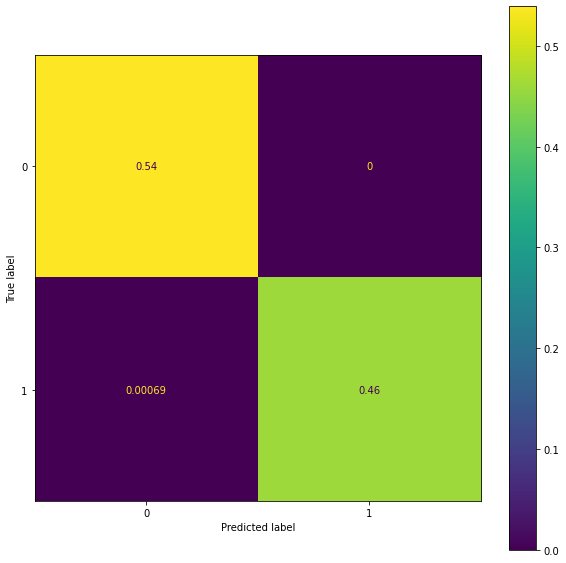




Regressão Logística
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0

Matriz de confusão:


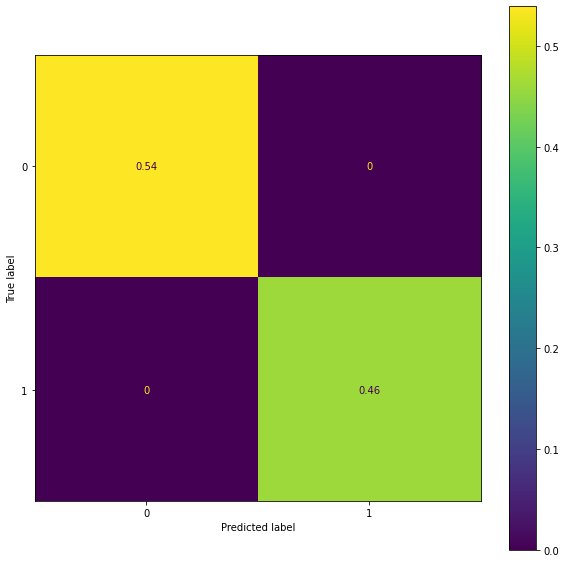




SVM
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0

Matriz de confusão:


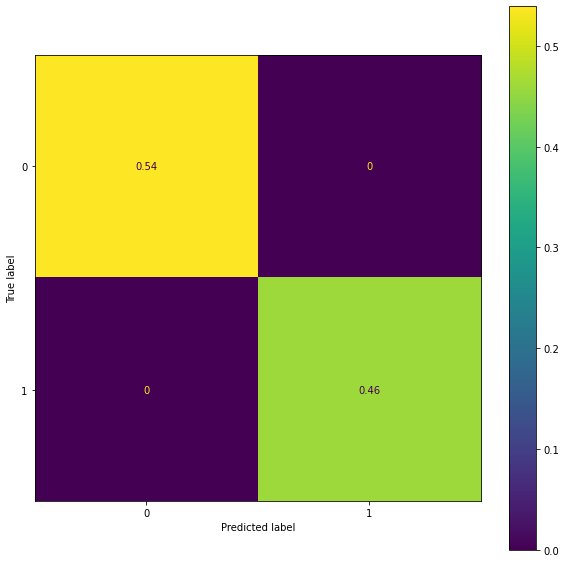




Random Forest
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0

Matriz de confusão:


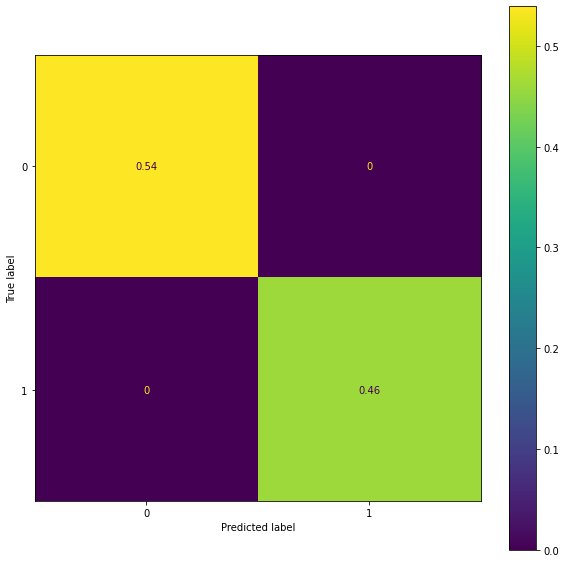

In [ ]:
# Ref.: https://towardsdatascience.com/

# Cria um classificador KNN
classificador_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Cria um classificador Regressor
classificador_regressor = LogisticRegression()

# Cria um classificador SVM
classificador_svm = LinearSVC()

# Cria um classificador Random Forest
classificador_random_forest = RandomForestClassifier()

classificadores = {
    'KNN': classificador_knn,
    'Regressão Logística': classificador_regressor,
    'SVM': classificador_svm,
    'Random Forest': classificador_random_forest
}

for nome_classificador, classificador in classificadores.items():
    # Treina o classificador
    classificador.fit(x_treinamento, y_treinamento)

    # Testa o modelo utilizando o conjunto de validacao
    y_predicao = classificador.predict(x_teste)

    # Impressão dos resultados
    print('\n\n')
    print(nome_classificador)
    print("Acurácia:", accuracy_score(y_teste, y_predicao))
    print("Precisão:", precision_score(y_teste, y_predicao, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_teste, y_predicao, average='weighted'))
    print('')

    print('Matriz de confusão:')
    fig, ax = plt.subplots(figsize=(10,10))
    matriz_confusao = confusion_matrix(y_teste, y_predicao, normalize='all')
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot(ax=ax)
    plt.show()

## Dado que ocorreu um acidente, tenta predizer qual foi a causa do acidente

Para este caso será usado o dataframe df_inner_join, pois somente os registros de acidentes serão considerados agora. O objetivo agora não é dizer se houve um acidente ou não, mas sim saber qual foi a causa do acidente dentre as 9 classes.

### Preparação dos dados para treinamento

In [ ]:
# Separa as colunas que serão usadas como dados de entrada e saida
colunas_x = ['uf', 'rodovia', 'icm', 'sentido_via', 'km_acidente', 'fase_dia', 'condicao_metereologica']
coluna_y = 'causa_acidente'

# Separando os dados de entrada e saida
df_x = df_inner_join[colunas_x]
df_y = df_inner_join[coluna_y]

# Transformação dos atributos categóricos em numéricos
label_encoder = LabelEncoder()
mapeamento_colunas = dict()

for coluna in ['uf', 'sentido_via', 'fase_dia', 'condicao_metereologica']:
    df_x[coluna] = label_encoder.fit_transform(df_x[coluna])
    mapeamento_colunas[coluna] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df_y = label_encoder.fit_transform(df_y)
mapeamento_colunas[coluna_y] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

mapeamento_colunas

{'causa_acidente': {'Acúmulo de detritos': 0,
  'Condição da pista': 1,
  'Obras/obstáculos na pista': 2,
  'Pista estreita ou sem acostamento': 3,
  'Pista mal projetada': 4,
  'Problema de desnível': 5,
  'Problema de drenagem': 6,
  'Problema de sinalização/iluminação': 7,
  'Problema de visibilidade': 8},
 'condicao_metereologica': {'Chuva': 0,
  'Céu Claro': 1,
  'Garoa/Chuvisco': 2,
  'Ignorado': 3,
  'Neve': 4,
  'Nevoeiro/Neblina': 5,
  'Nublado': 6,
  'Sol': 7,
  'Vento': 8},
 'fase_dia': {'Amanhecer': 0,
  'Anoitecer': 1,
  'Plena Noite': 2,
  'Pleno dia': 3},
 'sentido_via': {'Crescente': 0, 'Decrescente': 1},
 'uf': {'AC': 0,
  'AL': 1,
  'AM': 2,
  'AP': 3,
  'BA': 4,
  'CE': 5,
  'ES': 6,
  'GO': 7,
  'MA': 8,
  'MG': 9,
  'MS': 10,
  'MT': 11,
  'PA': 12,
  'PB': 13,
  'PE': 14,
  'PI': 15,
  'PR': 16,
  'RJ': 17,
  'RN': 18,
  'RO': 19,
  'RR': 20,
  'RS': 21,
  'SC': 22,
  'SE': 23,
  'SP': 24,
  'TO': 25}}

In [ ]:
# Normalizando os dados
df_x_minmax = MinMaxScaler.fit_transform(df_x)
df_x = pd.DataFrame(df_x_minmax, columns=colunas_x)
df_x

,uf,rodovia,icm,sentido_via,km_acidente,fase_dia,condicao_metereologica
0,0.64,0.960825,0.401596,0.0,0.313242,0.666667,0.000
1,0.64,0.294845,0.335106,0.0,0.421461,0.000000,0.000
2,0.64,0.294845,0.449468,0.0,0.442922,1.000000,0.000
3,0.64,0.754639,0.188830,0.0,0.005479,1.000000,0.125
4,0.64,0.960825,0.202128,1.0,0.111416,1.000000,0.750
...,...,...,...,...,...,...,...
2313,0.68,0.061856,0.242021,1.0,0.007763,0.666667,0.250
2314,0.68,0.061856,0.295213,1.0,0.003653,1.000000,0.000
2315,0.68,0.061856,0.760638,1.0,0.002557,1.000000,0.000
2316,0.68,0.061856,0.202128,1.0,0.001187,1.000000,0.000


In [ ]:
# Criando os conjuntos de treinamento, teste e validação
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(df_x, df_y, test_size=0.3, shuffle=True)

print(f'x_treinamento: {len(x_treinamento)}')
print(f'x_teste: {len(x_teste)}')
print(f'y_treinamento: {len(y_treinamento)}')
print(f'y_teste: {len(y_teste)}')

x_treinamento: 1622
x_teste: 696
y_treinamento: 1622
y_teste: 696


### Treinamento dos algoritmos




KNN
Acurácia: 0.3793103448275862
Precisão: 0.3497727204340373
Recall: 0.3793103448275862

Matriz de confusão:


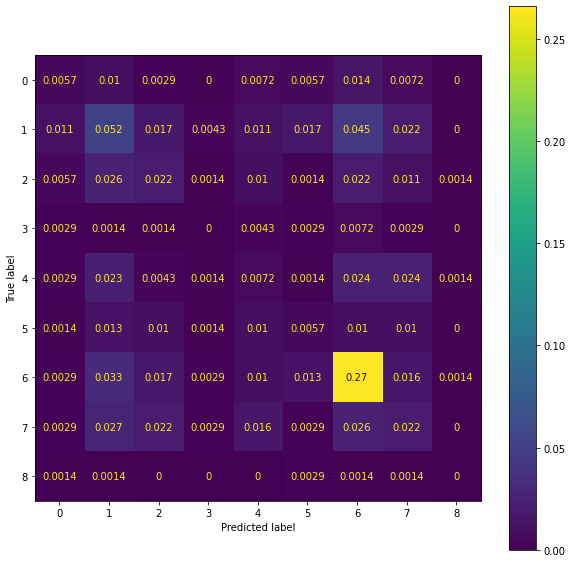




Regressão Logística
Acurácia: 0.41522988505747127
Precisão: 0.2814892156992367
Recall: 0.41522988505747127

Matriz de confusão:


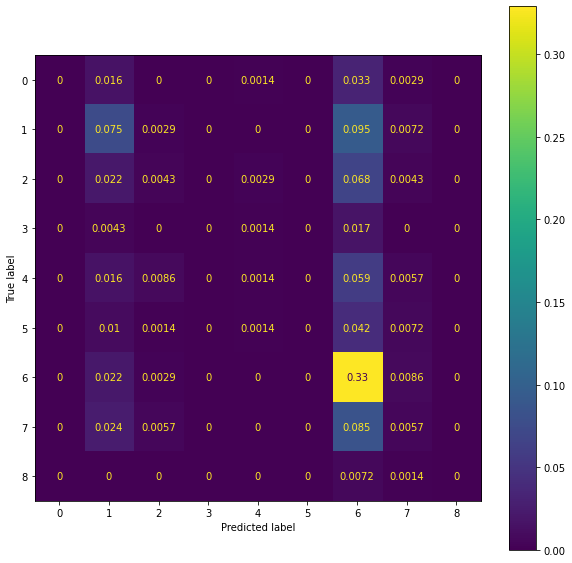




SVM
Acurácia: 0.4109195402298851
Precisão: 0.2813172202647241
Recall: 0.4109195402298851

Matriz de confusão:


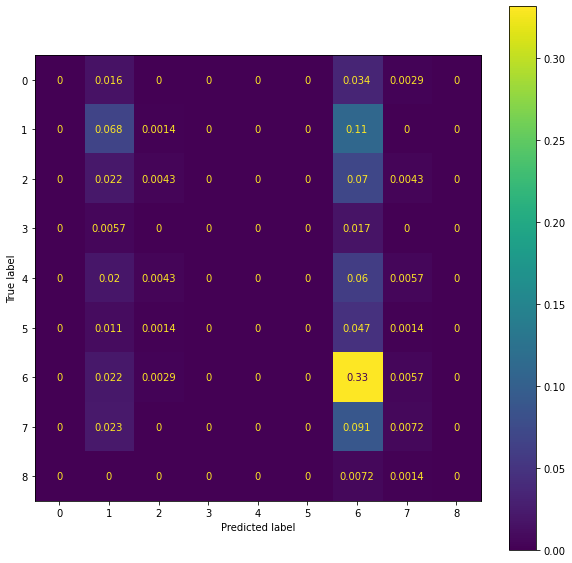




Random Forest
Acurácia: 0.4899425287356322
Precisão: 0.4472330207416267
Recall: 0.4899425287356322

Matriz de confusão:


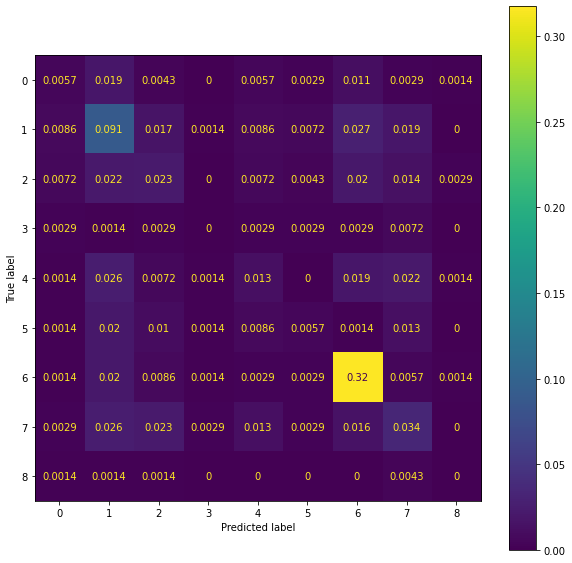




Multilayer perceptron (MLP)
Acurácia: 0.5201149425287356
Precisão: 0.38657040341225934
Recall: 0.5201149425287356

Matriz de confusão:


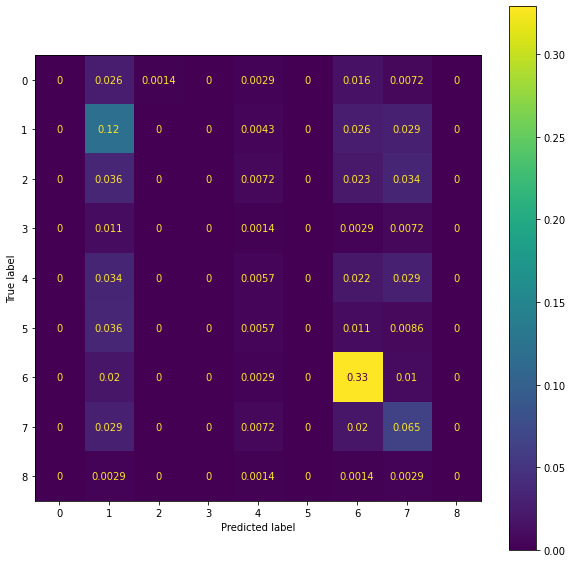

In [ ]:
# Cria um classificador KNN
classificador_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Cria um classificador Regressor
classificador_regressor = LogisticRegression()

# Cria um classificador SVM
classificador_svm = LinearSVC()

# Cria um classificador Random Forest
classificador_random_forest = RandomForestClassifier()

# Cria um classificador Multilayer perceptron (MLP)
classificador_mlp = classificador = MLPClassifier(hidden_layer_sizes=(14, 14, 14), random_state=1, activation="relu", solver='adam', max_iter=1000)

classificadores = {
    'KNN': classificador_knn,
    'Regressão Logística': classificador_regressor,
    'SVM': classificador_svm,
    'Random Forest': classificador_random_forest,
    'Multilayer perceptron (MLP)': classificador_mlp
}

for nome_classificador, classificador in classificadores.items():
    # Treina o classificador
    classificador.fit(x_treinamento, y_treinamento)

    # Testa o modelo utilizando o conjunto de validacao
    y_predicao = classificador.predict(x_teste)

    # Impressão dos resultados
    print('\n\n')
    print(nome_classificador)
    print("Acurácia:", accuracy_score(y_teste, y_predicao))
    print("Precisão:", precision_score(y_teste, y_predicao, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_teste, y_predicao, average='weighted'))
    print('')

    print('Matriz de confusão:')
    fig, ax = plt.subplots(figsize=(10,10))
    matriz_confusao = confusion_matrix(y_teste, y_predicao, normalize='all')
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot(ax=ax)
    plt.show()